## Data Preview 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../input/videogamesales/vgsales.csv')
df.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
df.describe()

Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16598.000000  16327.000000  16598.000000  16598.000000  16598.000000   
mean    8300.605254   2006.406443      0.264667      0.146652      0.077782   
std     4791.853933      5.828981      0.816683      0.505351      0.309291   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4151.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8300.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12449.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16598.000000  16598.000000  
mean       0.048063      0.537441  
std        0.188588      1.555028  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.470000  
max       10.570000     82.740000

In [5]:
# !pip install pandas-profiling
import pandas_profiling

df.profile_report()

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Data Manipulation

In [6]:
df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
df['Year'] = df['Year'].fillna(df['Year'].mean())
df['Year'] = df['Year'].astype('int')

In [8]:
df['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
UEP Systems                        1
Imax                               1
Universal Gamex                    1
Quest                              1
Genterprise                        1
Name: Publisher, Length: 578, dtype: int64

In [9]:
df['Publisher'] = df['Publisher'].fillna(df['Publisher'].mode()[0])
df.isna().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

## Data Visualization for EDA

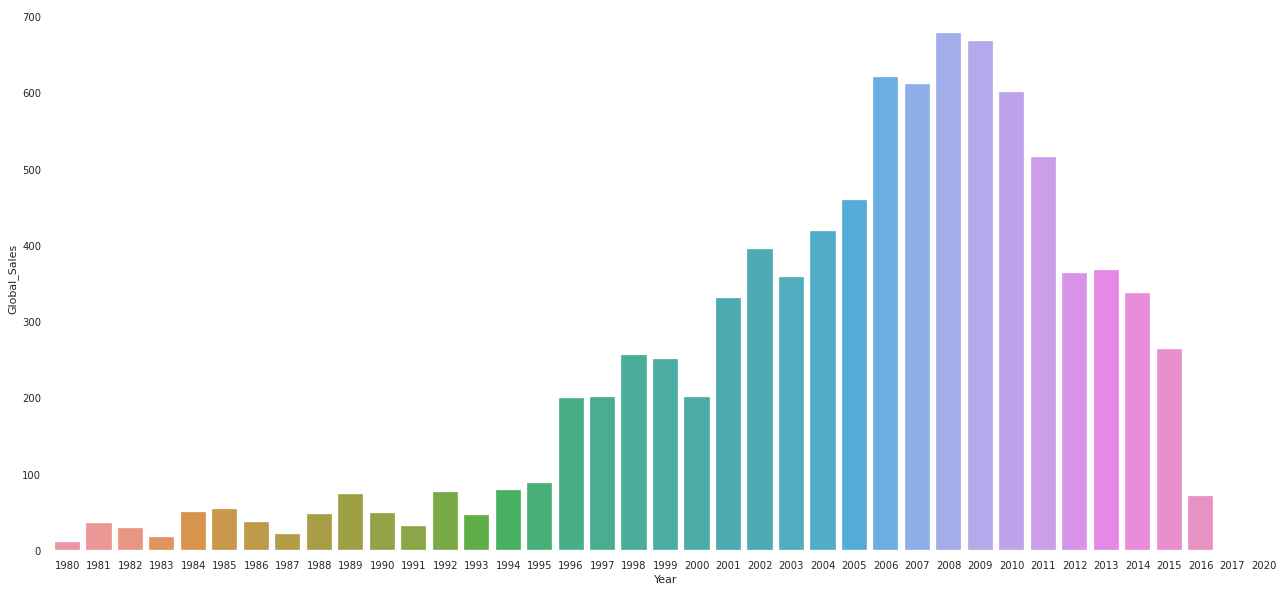

In [10]:
year_sales=df.groupby(['Year'])['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(22,10))
plt.ylabel('Global_Sales')
sns.barplot(x= year_sales.index, y= year_sales.values)

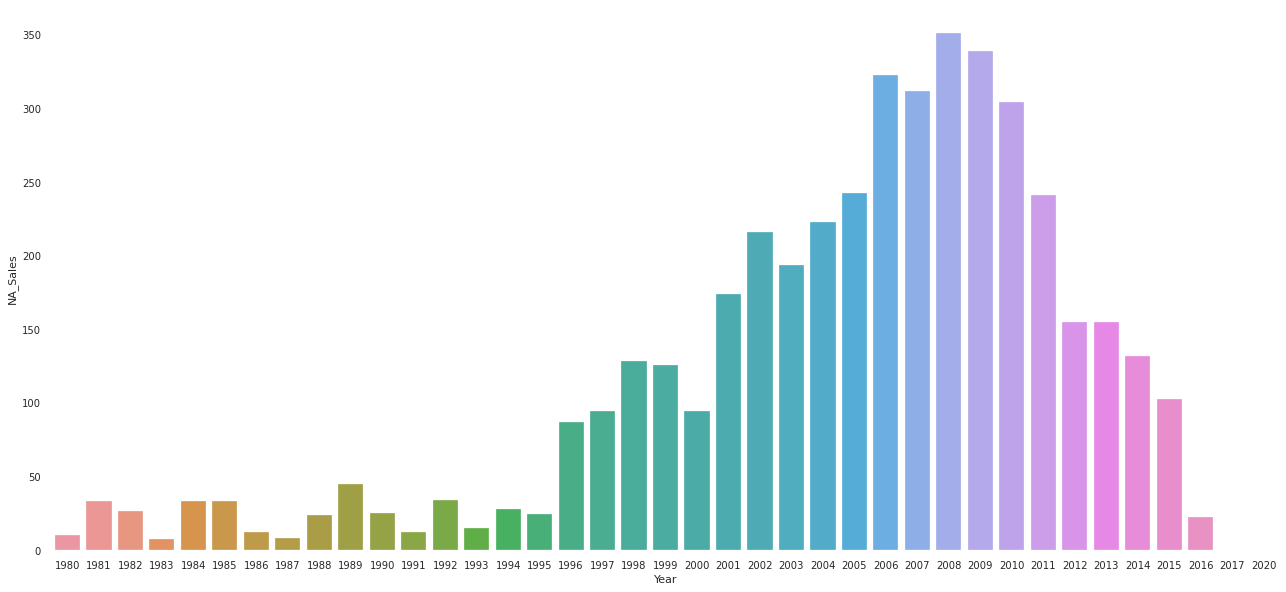

In [11]:
year_na_sales=df.groupby(['Year'])['NA_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(22,10))
plt.ylabel('NA_Sales')
sns.barplot(x= year_na_sales.index, y= year_na_sales.values)

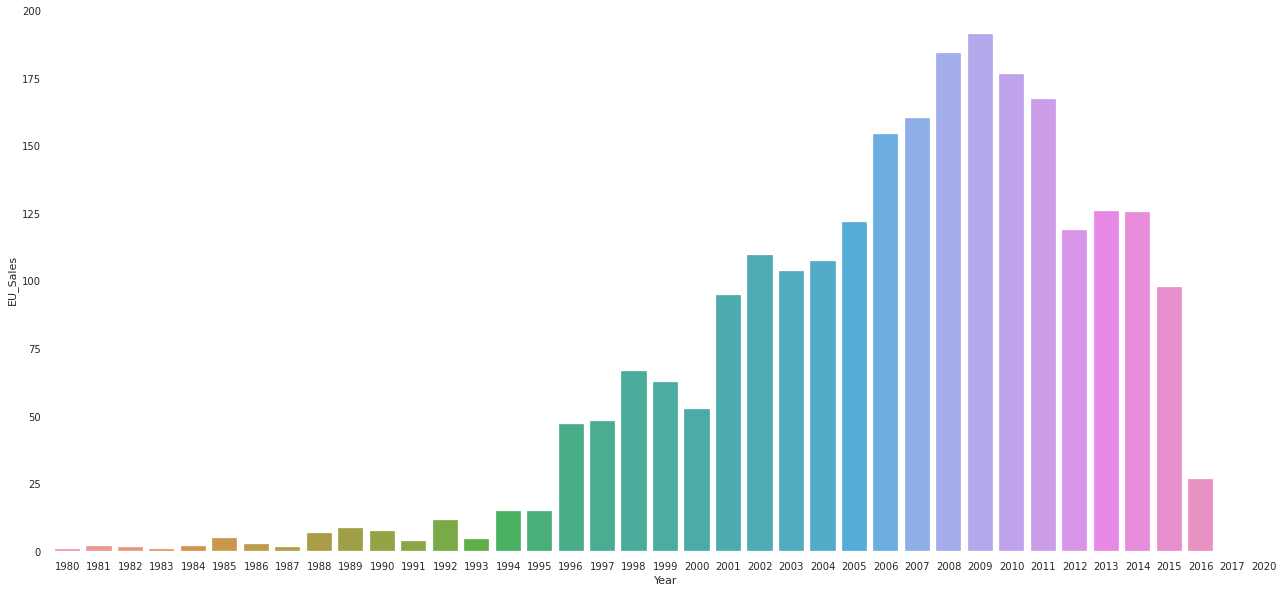

In [12]:
year_eu_sales=df.groupby(['Year'])['EU_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(22,10))
plt.ylabel('EU_Sales')
sns.barplot(x= year_eu_sales.index, y= year_eu_sales.values)

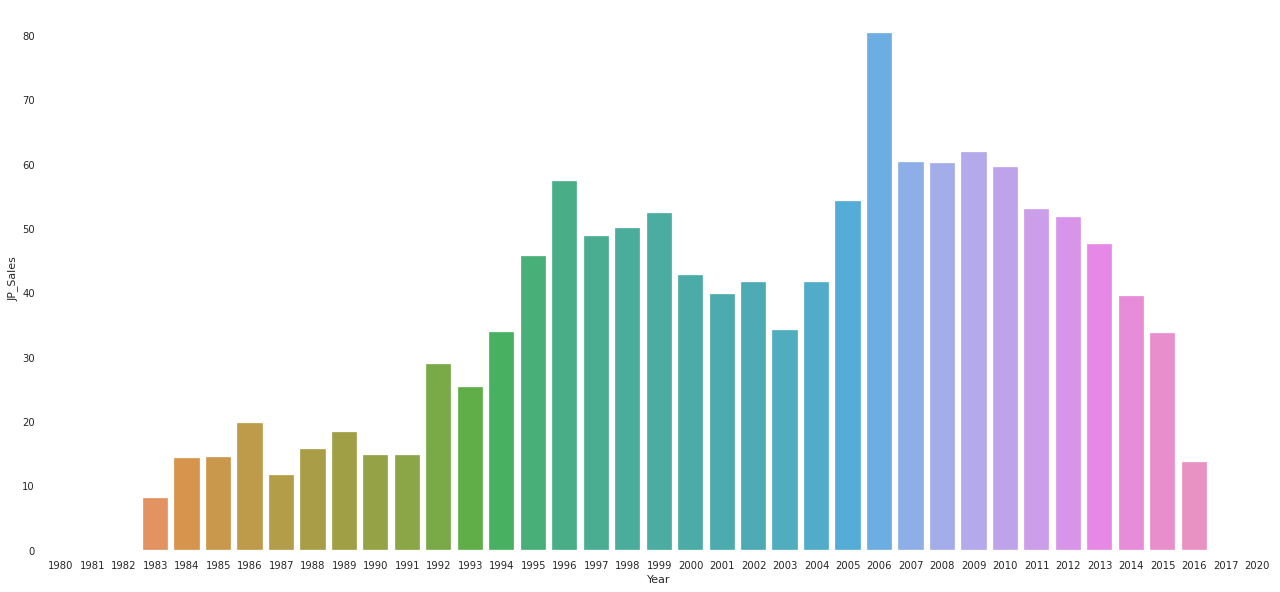

In [13]:
year_jp_sales=df.groupby(['Year'])['JP_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(22,10))
plt.ylabel('JP_Sales')
sns.barplot(x= year_jp_sales.index, y= year_jp_sales.values)

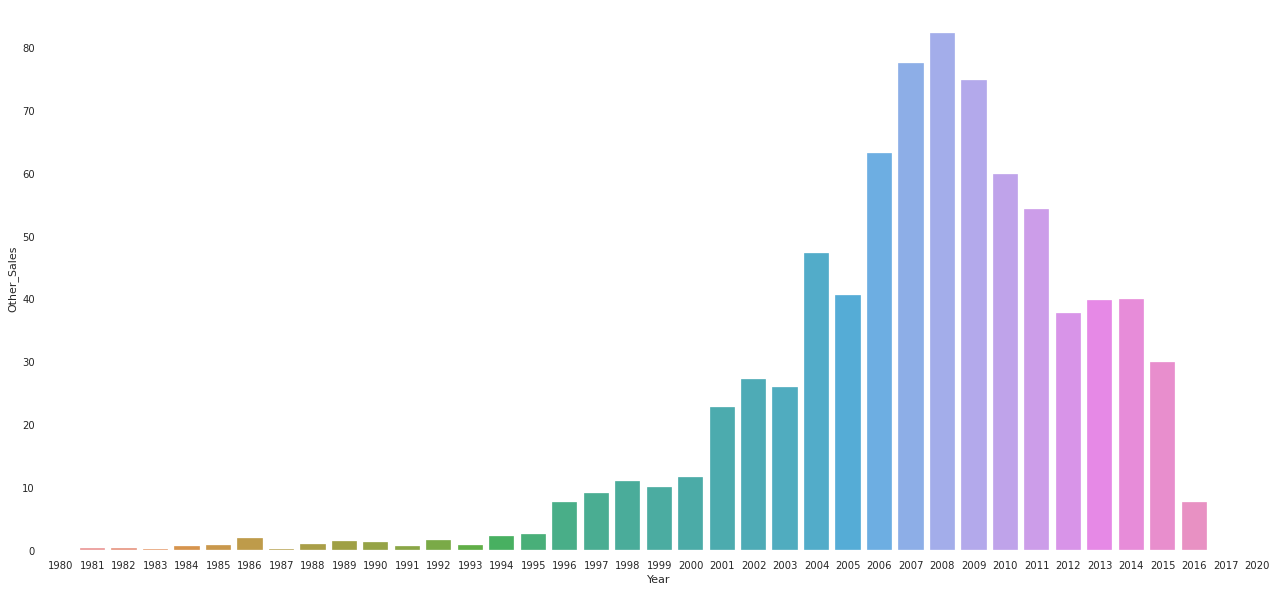

In [14]:
year_other_sales=df.groupby(['Year'])['Other_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(22,10))
plt.ylabel('Other_Sales')
sns.barplot(x= year_other_sales.index, y= year_other_sales.values)

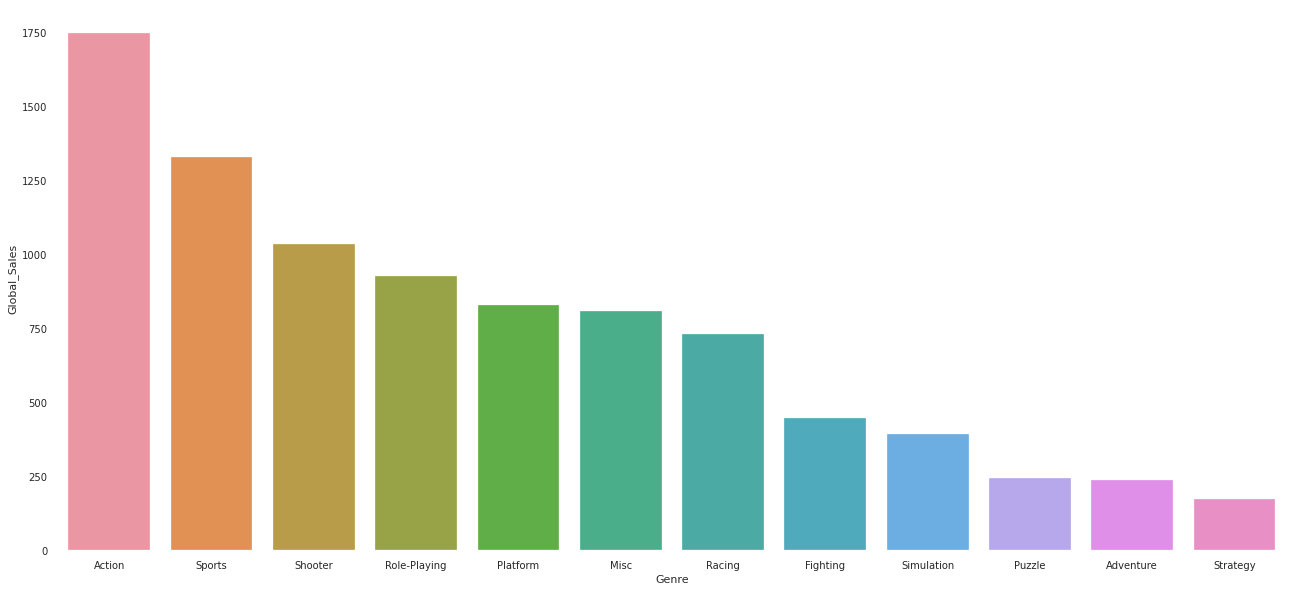

In [15]:
genre_sales = df.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(22,10))
plt.ylabel('Global_Sales')
sns.barplot(x= genre_sales.index, y= genre_sales.values)

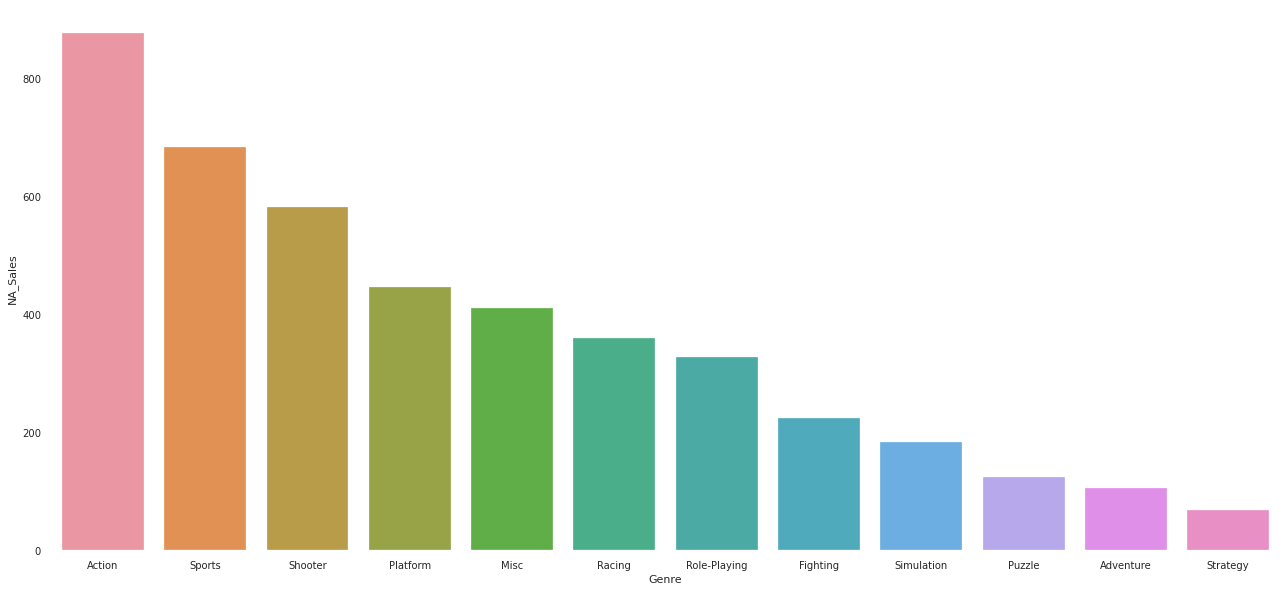

In [16]:
genre_na_sales = df.groupby(['Genre'])['NA_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(22,10))
plt.ylabel('NA_Sales')
sns.barplot(x= genre_na_sales.index, y= genre_na_sales.values)

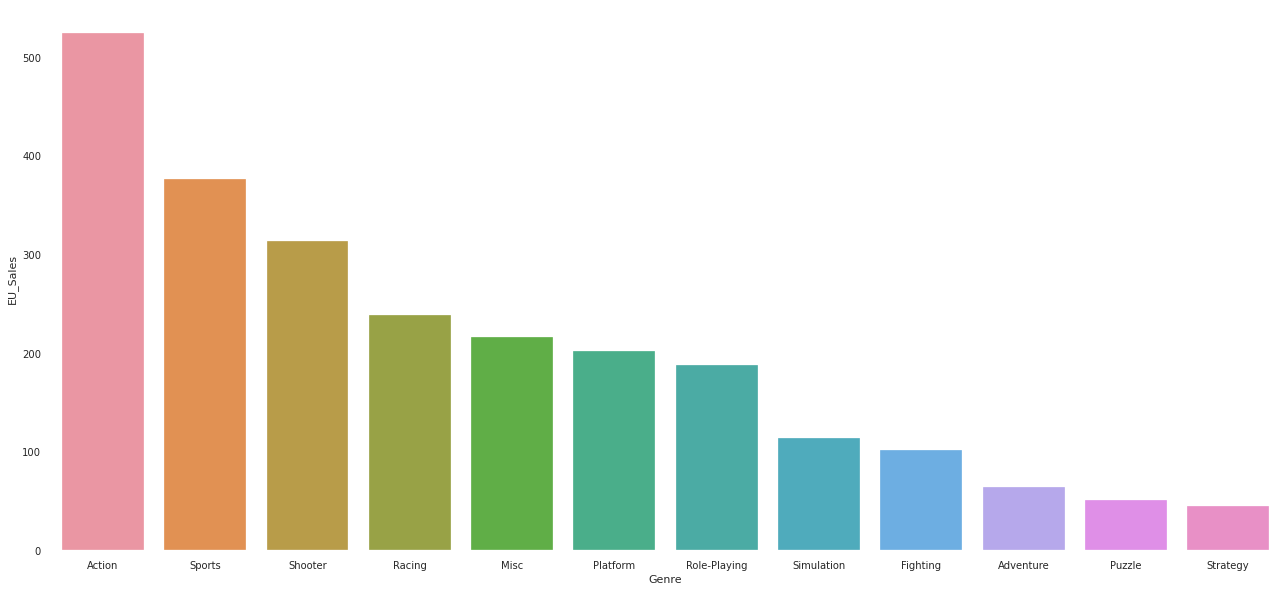

In [17]:
genre_eu_sales = df.groupby(['Genre'])['EU_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(22,10))
plt.ylabel('EU_Sales')
sns.barplot(x= genre_eu_sales.index, y= genre_eu_sales.values)

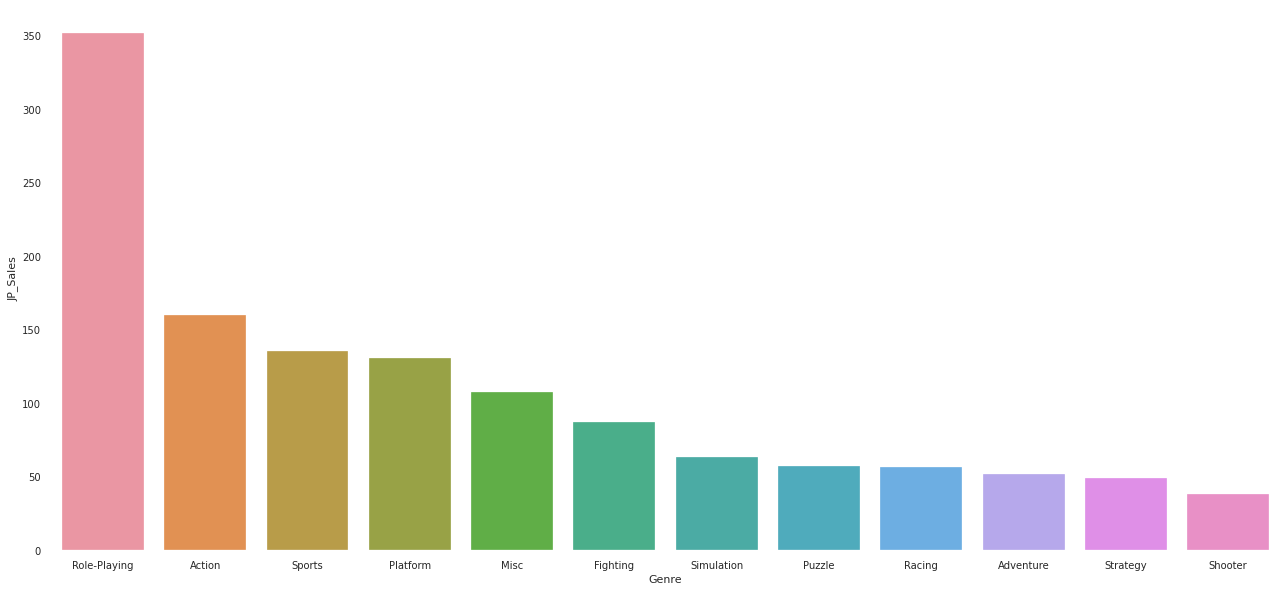

In [18]:
genre_jp_sales = df.groupby(['Genre'])['JP_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(22,10))
plt.ylabel('JP_Sales')
sns.barplot(x= genre_jp_sales.index, y= genre_jp_sales.values)

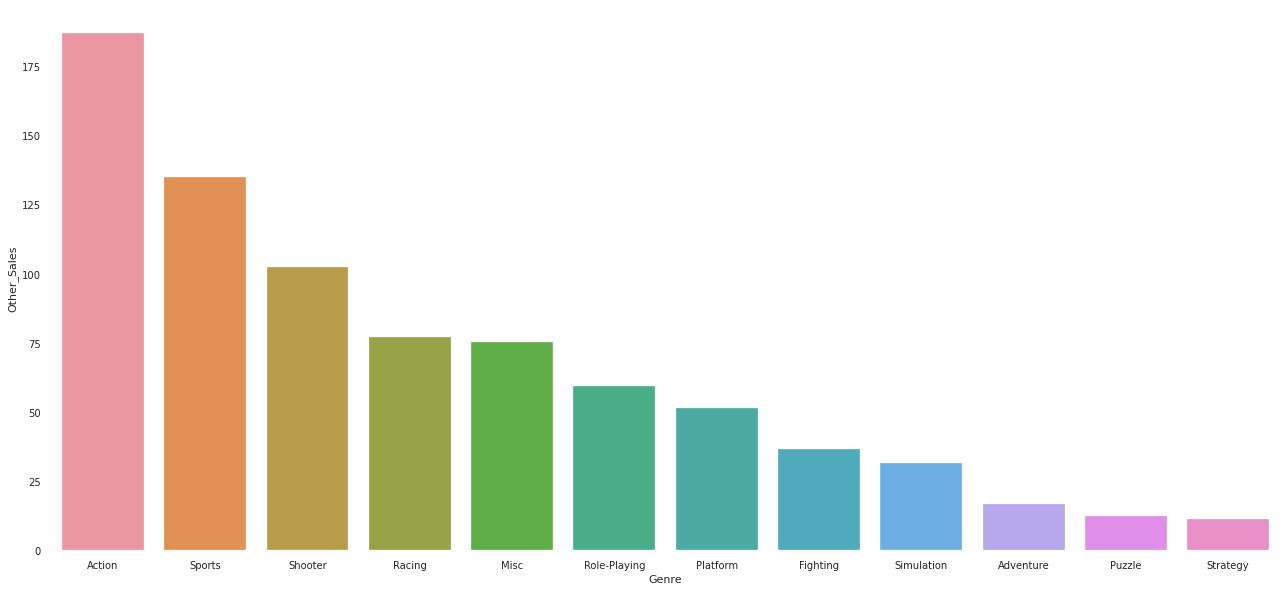

In [19]:
genre_other_sales = df.groupby(['Genre'])['Other_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(22,10))
plt.ylabel('Other_Sales')
sns.barplot(x= genre_other_sales.index, y= genre_other_sales.values)

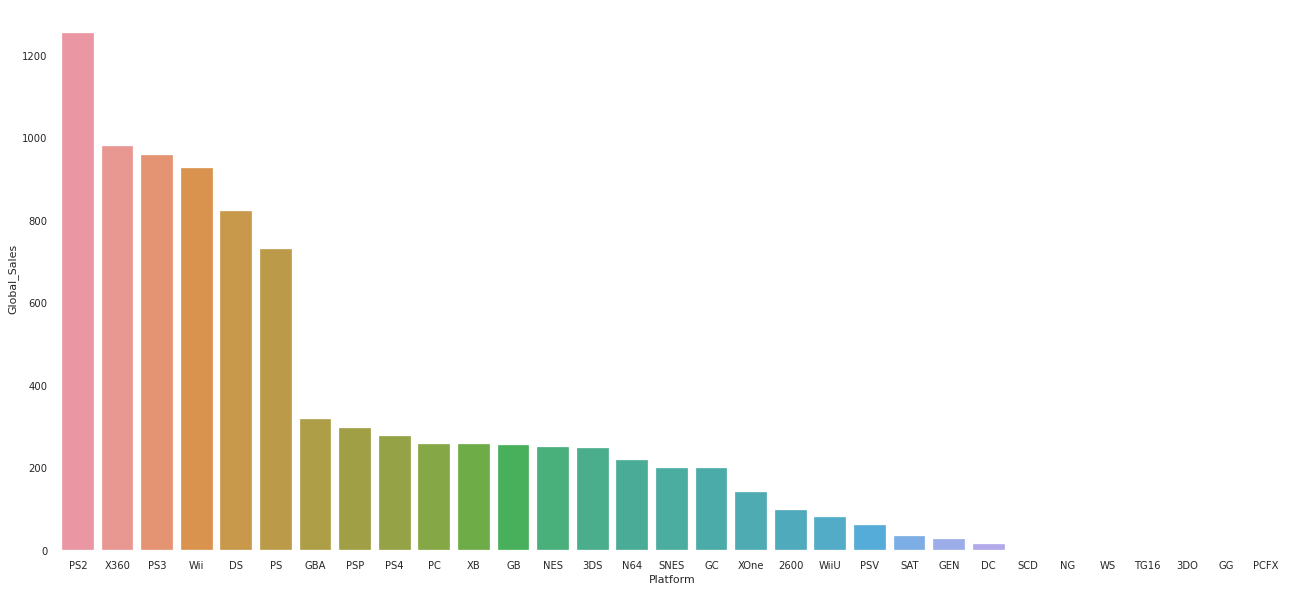

In [20]:
platform_sales = df.groupby(['Platform'])['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(22,10))
plt.ylabel('Global_Sales')
sns.barplot(x= platform_sales.index, y= platform_sales.values)

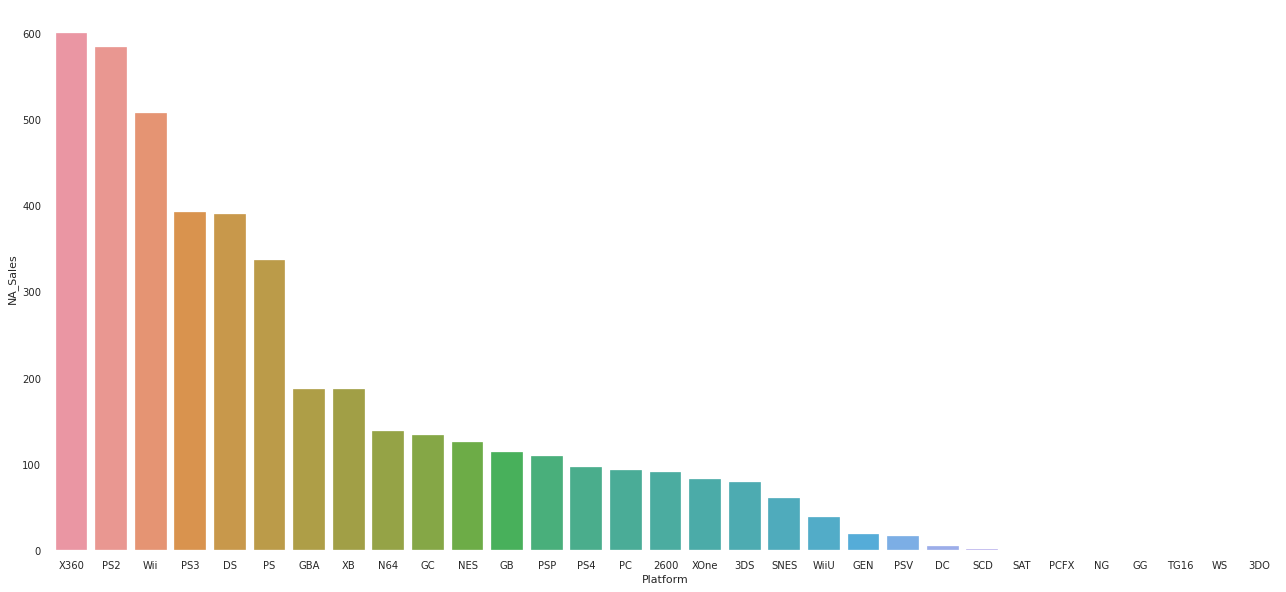

In [21]:
platform_na_sales = df.groupby(['Platform'])['NA_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(22,10))
plt.ylabel('NA_Sales')
sns.barplot(x= platform_na_sales.index, y= platform_na_sales.values)

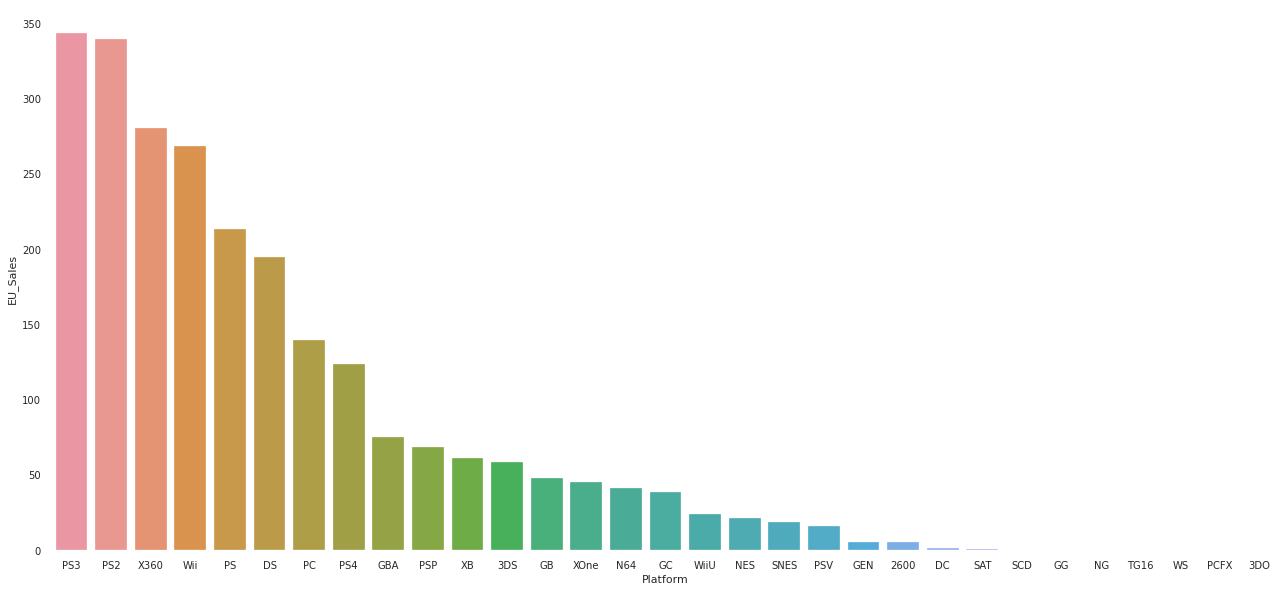

In [22]:
platform_eu_sales = df.groupby(['Platform'])['EU_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(22,10))
plt.ylabel('EU_Sales')
sns.barplot(x= platform_eu_sales.index, y= platform_eu_sales.values)

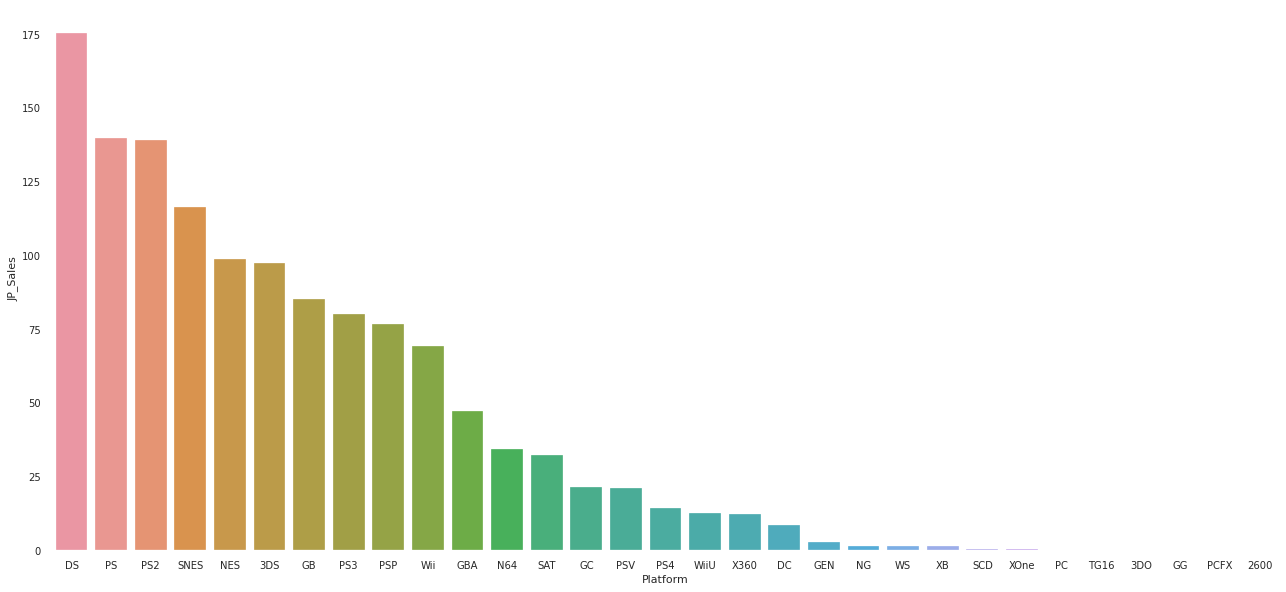

In [23]:
platform_jp_sales = df.groupby(['Platform'])['JP_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(22,10))
plt.ylabel('JP_Sales')
sns.barplot(x= platform_jp_sales.index, y= platform_jp_sales.values)

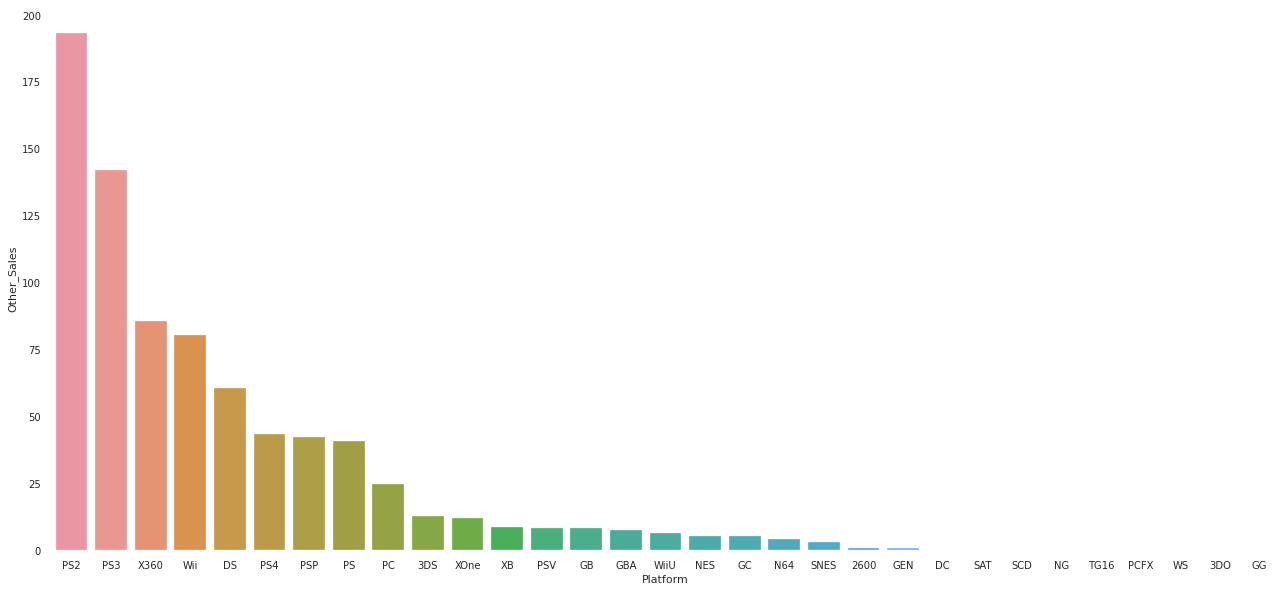

In [24]:
platform_other_sales = df.groupby(['Platform'])['Other_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(22,10))
plt.ylabel('Other_Sales')
sns.barplot(x= platform_other_sales.index, y= platform_other_sales.values)

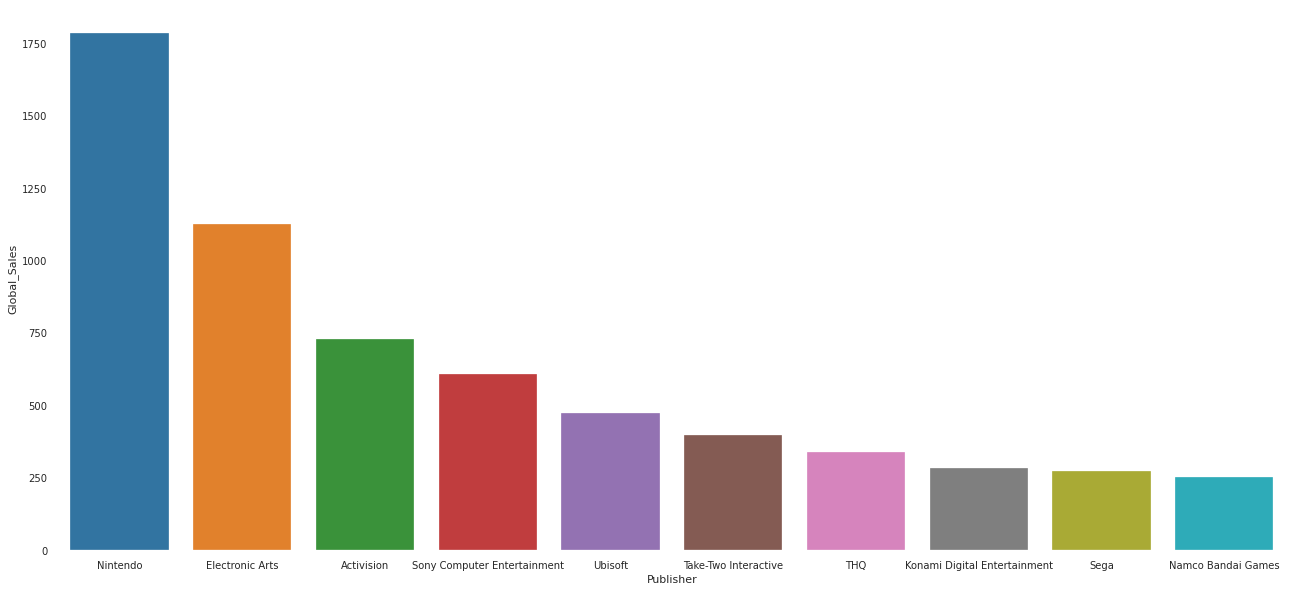

In [25]:
global_publisher=df.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(22,10))
plt.ylabel('Global_Sales')
sns.barplot(x= global_publisher.index, y= global_publisher.values)


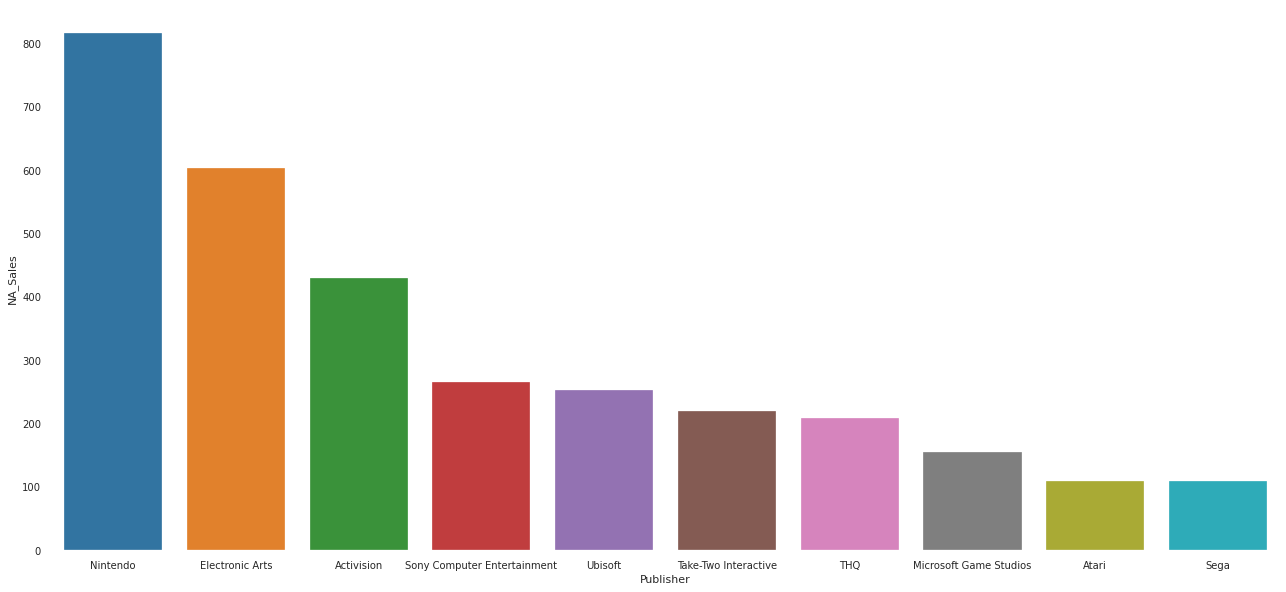

In [26]:
na_publisher=df.groupby(['Publisher'])['NA_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(22,10))
plt.ylabel('NA_Sales')
sns.barplot(x= na_publisher.index, y= na_publisher.values)


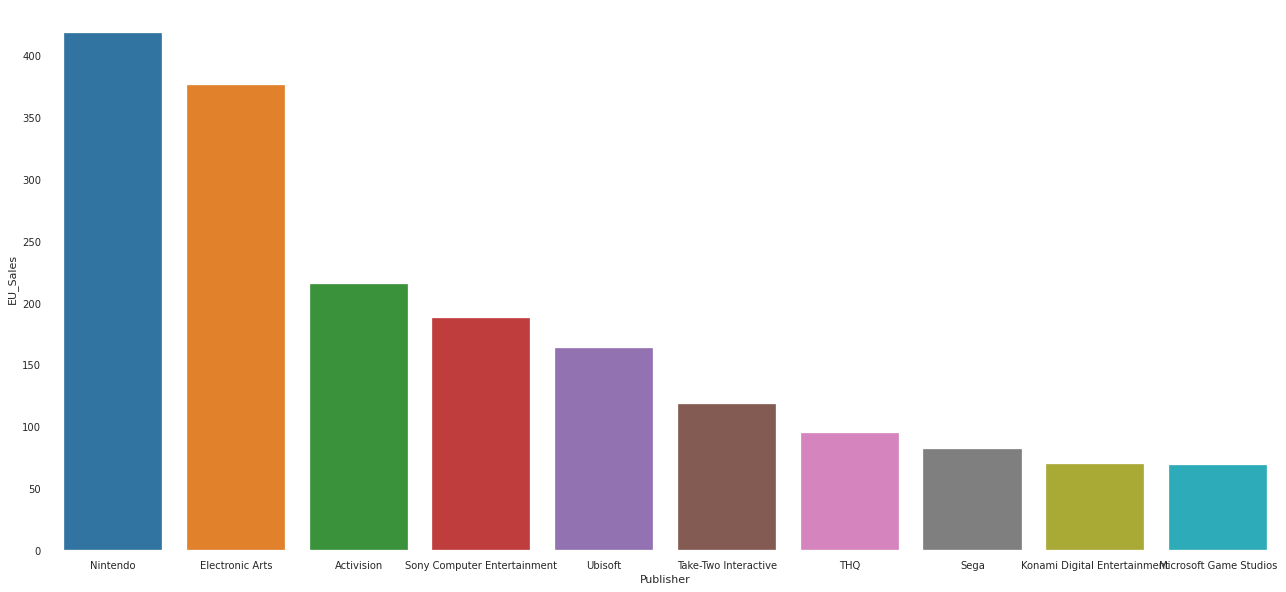

In [27]:
eu_publisher=df.groupby(['Publisher'])['EU_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(22,10))
plt.ylabel('EU_Sales')
sns.barplot(x= eu_publisher.index, y= eu_publisher.values)

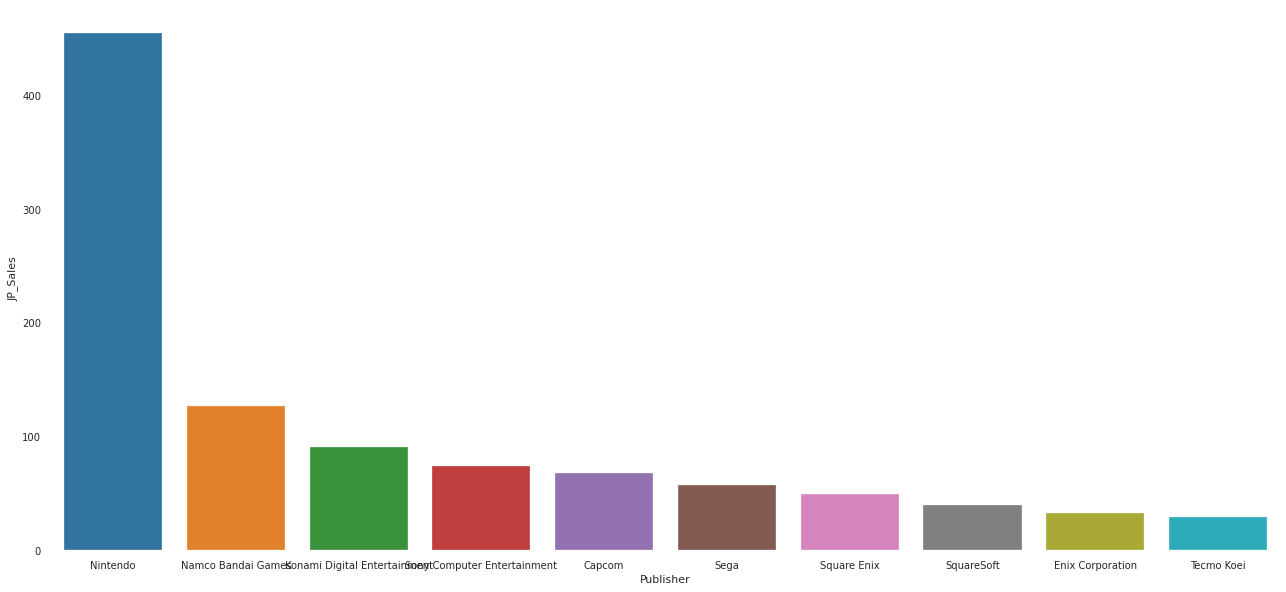

In [28]:
jp_publisher=df.groupby(['Publisher'])['JP_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(22,10))
plt.ylabel('JP_Sales')
sns.barplot(x= jp_publisher.index, y= jp_publisher.values)

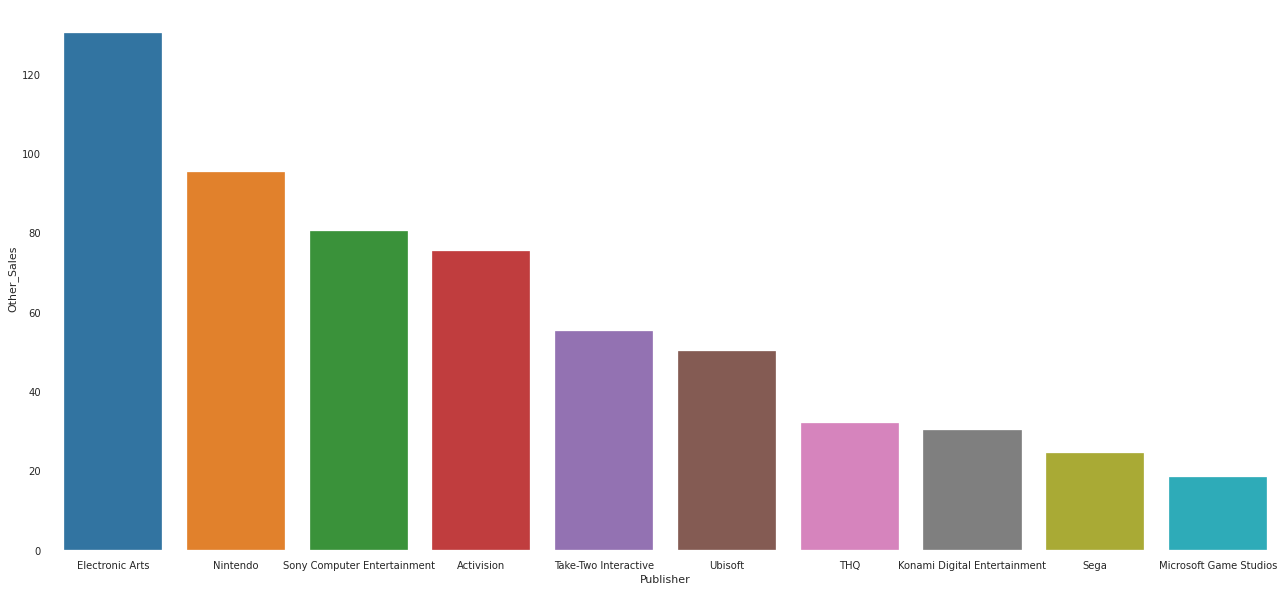

In [29]:
other_publisher=df.groupby(['Publisher'])['Other_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(22,10))
plt.ylabel('Other_Sales')
sns.barplot(x= other_publisher.index, y= other_publisher.values)

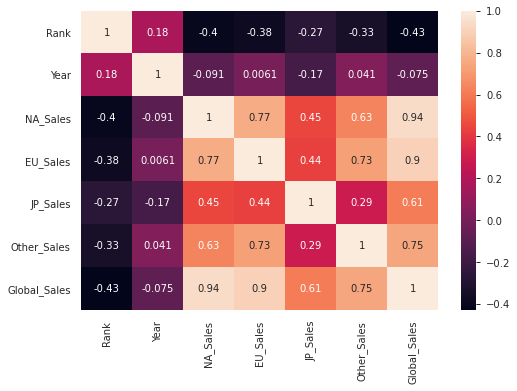

In [30]:
sns.heatmap(df.corr(),annot=True)

In [31]:
df

Rank                                              Name Platform  Year  \
0          1                                        Wii Sports      Wii  2006   
1          2                                 Super Mario Bros.      NES  1985   
2          3                                    Mario Kart Wii      Wii  2008   
3          4                                 Wii Sports Resort      Wii  2009   
4          5                          Pokemon Red/Pokemon Blue       GB  1996   
...      ...                                               ...      ...   ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA  2002   
16594  16597                     Men in Black II: Alien Escape       GC  2003   
16595  16598  SCORE International Baja 1000: The Official Game      PS2  2008   
16596  16599                                        Know How 2       DS  2010   
16597  16600                                  Spirits & Spells      GBA  2003   

              Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0            Sports    Nintendo     41.49     29.02      3.77         8.46   
1          Platform    Nintendo     29.08      3.58      6.81         0.77   
2            Racing    Nintendo     15.85     12.88      3.79         3.31   
3            Sports    Nintendo     15.75     11.01      3.28         2.96   
4      Role-Playing    Nintendo     11.27      8.89     10.22         1.00   
...             ...         ...       ...       ...       ...          ...   
16593      Platform       Kemco      0.01      0.00      0.00         0.00   
16594       Shooter  Infogrames      0.01      0.00      0.00         0.00   
16595        Racing  Activision      0.00      0.00      0.00         0.00   
16596        Puzzle    7G//AMES      0.00      0.01      0.00         0.00   
16597      Platform     Wanadoo      0.01      0.00      0.00         0.00   

       Global_Sales  
0             82.74  
1             40.24  
2             35.82  
3             33.00  
4             31.37  
...             ...  
16593          0.01  
16594          0.01  
16595          0.01  
16596          0.01  
16597          0.01  

[16598 rows x 11 columns]

## Data Preprocessing

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

feature = ['Platform', 'Genre', 'Publisher']


for col in feature:
    df[col] = le.fit_transform(df[col])

df = df.drop('Name',axis=1)

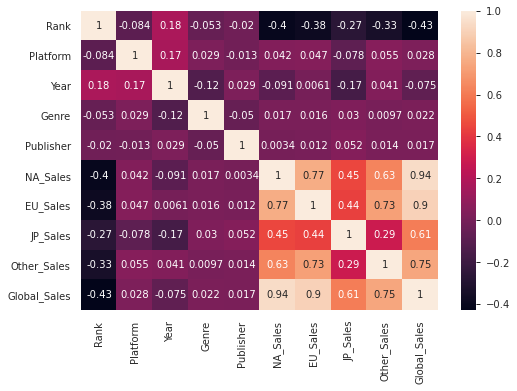

In [33]:
sns.heatmap(df.corr(),annot=True)

In [34]:
from sklearn.model_selection import train_test_split

X = df.drop(['Global_Sales'],axis=1)
y = df['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)



In [35]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Data Modelling & Hyperparameters

 ### K-Nearest-Neighbors Regression

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor()

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Accuracy:', knn.score(X_test, y_test))
print('RMSE Error:', rmse)


Accuracy: 0.7846007058442435
RMSE Error: 0.8729396711099743


 ### K-Nearest-Neighbors Regression Hyperparameter

In [37]:
from sklearn.model_selection import GridSearchCV

knn_params = {'n_neighbors': np.arange(1,10,1), 
              'metric':['manhattan','euclidean','minkowski']}

knn = KNeighborsRegressor()

knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

knn_cv_model.fit(X_train, y_train)

print(knn_cv_model.best_params_["n_neighbors"])
print(knn_cv_model.best_params_["metric"])

2
manhattan


 ### K-Nearest-Neighbors Regression Best Hyperparameters

In [38]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"],
                                metric=knn_cv_model.best_params_["metric"])

knn_tuned.fit(X_train, y_train)

y_pred = knn_tuned.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.8059548628576264


### Decision Tree Regression

In [39]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=32)

dtr.fit(X_train, y_train)

y_pred = dtr.predict(X_test)

print('Accuracy:',dtr.score(X_test, y_test))
print('RMSE Error:',np.sqrt(mean_squared_error(y_test, y_pred)))


Accuracy: 0.8484992533984408
RMSE Error: 0.7320984363334807


### Decision Tree Regression Hyperparameters

In [40]:
dtr_params = {"min_samples_split": range(2,50),
               "max_leaf_nodes": range(2,20)}

dtr = DecisionTreeRegressor()

dtr_cv_model = GridSearchCV(dtr, dtr_params, cv = 10)

dtr_cv_model.fit(X_train, y_train)

print(dtr_cv_model.best_params_["min_samples_split"])
print(dtr_cv_model.best_params_["max_leaf_nodes"])

5
19


### Decision Tree Regression Best Hyperparameters

In [41]:
dtr_tuned = DecisionTreeRegressor(min_samples_split = dtr_cv_model.best_params_["min_samples_split"],
                                max_leaf_nodes=dtr_cv_model.best_params_["max_leaf_nodes"])

dtr_tuned.fit(X_train, y_train)

y_pred = dtr_tuned.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.7076448961563034


### Random Forest Regression

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=10)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print('Accuracy:',rf.score(X_test, y_test))
print('RMSE Error:',np.sqrt(mean_squared_error(y_test, y_pred)))


Accuracy: 0.8529903930968159
RMSE Error: 0.7211655143526805


### Random Forest Regression Hyperparameters

In [43]:
from sklearn.model_selection import RandomizedSearchCV


rf_params = {'max_depth': list(range(1,5)),
            'max_features': [2,4,8],
            'n_estimators' : [100, 300, 500]}

rf = RandomForestRegressor()

rf_cv_model = RandomizedSearchCV(estimator=rf, param_distributions = rf_params,
                               cv = 10, n_iter = 10, n_jobs=-1)

rf_cv_model.fit(X_train, y_train)

print(rf_cv_model.best_params_["max_depth"])
print(rf_cv_model.best_params_["max_features"])
print(rf_cv_model.best_params_["n_estimators"])

4
8
100


### Random Forest Regression Best Hyperparameters

In [44]:
rf_tuned = RandomForestRegressor(max_depth = rf_cv_model.best_params_["max_depth"],
                                max_features = rf_cv_model.best_params_["max_features"],
                                n_estimators = rf_cv_model.best_params_["n_estimators"])

rf_tuned.fit(X_train, y_train)

y_pred = rf_tuned.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.7312135415111699
